In [47]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import datasets, svm, metrics

In [48]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [49]:
path=os.path.join(os.path.dirname(os.path.realpath('machine_learning.py')), 'data')
car=[]
X=[]
y=[]
file=os.listdir(path+'/Cars/')
print(file)
for i in file:
    f=os.listdir(path+'/Cars/'+i)
    for j in f:
        p=pd.read_csv(path+"/Cars/"+i+"/"+j,header=None)
        p=p.to_numpy()
        car.append(p)
        X.append(p)
        # d=[1,0,0]
        y.append(0)
print("done car")
drone=[]
file=os.listdir(path+'/Drones/')
for i in file:
    f=os.listdir(path+'/Drones/'+i)
    for j in f:
        p=pd.read_csv(path+"/Drones/"+i+"/"+j,header=None)
        p=p.to_numpy()
        drone.append(p)
        X.append(p)
        # d=[0,1,0]
        y.append(1)
print("done drone")        
people=[]
file=os.listdir(path+'/People/')
for i in file:
    f=os.listdir(path+'/People/'+i)
    for j in f:
        p=pd.read_csv(path+"/People/"+i+"/"+j,header=None)
        p=p.to_numpy()
        people.append(p)
        X.append(p)
        # d=[0,0,1]
        y.append(2)
print("done people")

['13-13', '13-13p', '13-19', '13-23', '13-23p', '13-29', '13-38', '13-44', '13-49', '13-49p', '13-54', '15-37', '15-37p', '15-42', '15-42p', '15-48', '15-48p', '15-55', '15-55a', '15-55m', '15-55p', '16-01', '16-01p', '16-07', '16-07p', '17-09', '17-09p']
done car
done drone
done people


(5720, 11, 61)
(5065, 11, 61)
(6700, 11, 61)


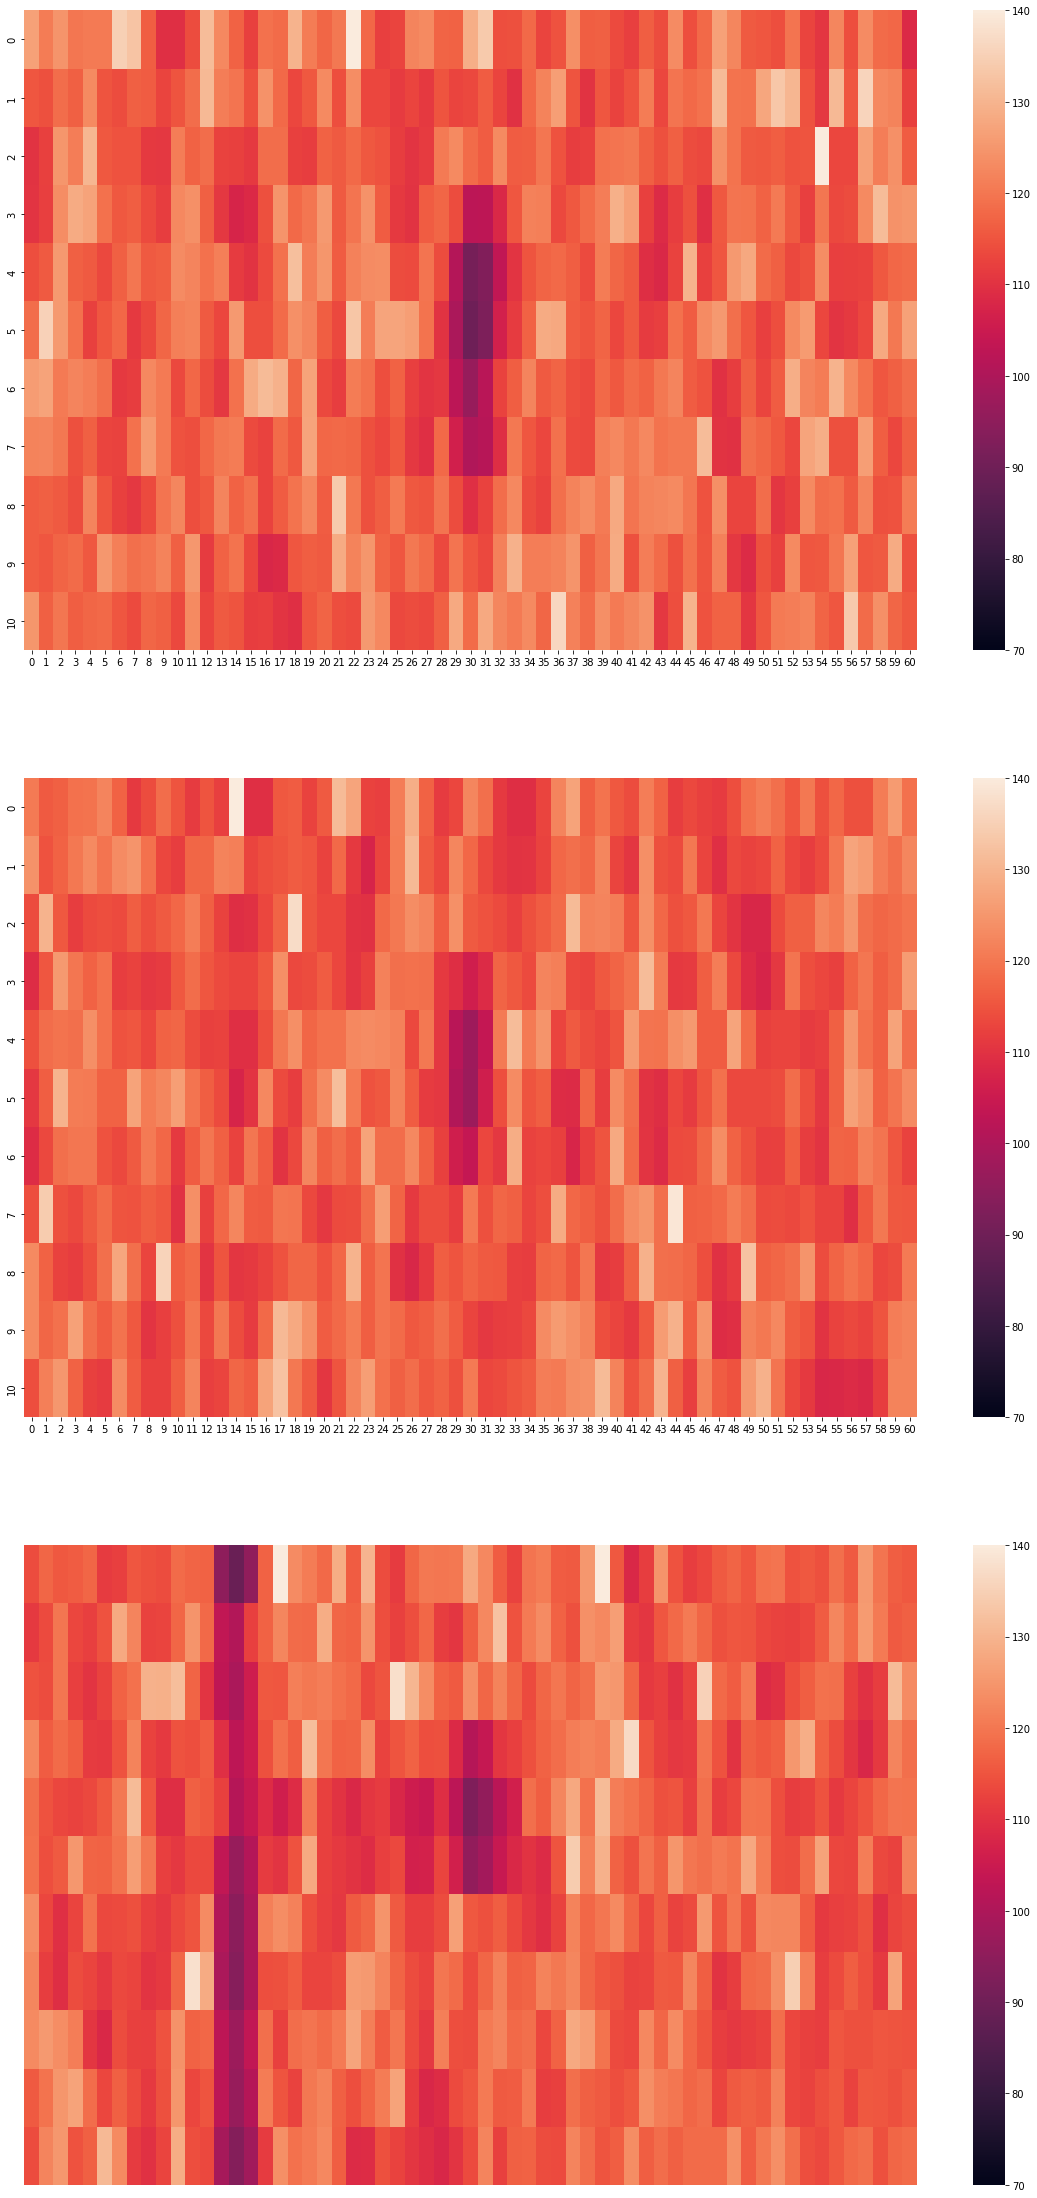

In [54]:
car=np.asarray(car)
car=np.absolute(car)
drone=np.absolute(drone)
people=np.absolute(people)
fig, axes = plt.subplots(3, 1, figsize=(20, 40))
plt.axis('off')
img_list = [car, drone, people]
for i, img in enumerate(img_list):
    sns.heatmap(img[20],vmin=70,vmax=140,ax=axes[i])
    print(np.shape(img))

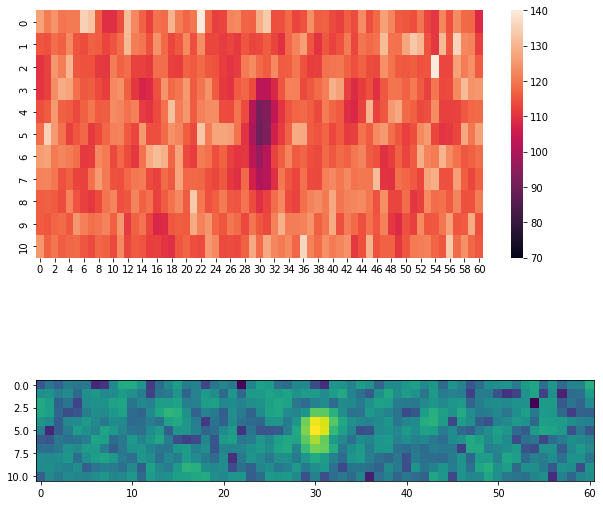

In [51]:
fig, axes = plt.subplots(2,1 ,figsize=(10,10))
sns.heatmap(car[20],vmin=70,vmax=140, ax=axes[0])
axes[1].imshow(X[20])

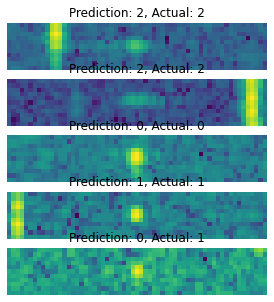

In [66]:
X = np.asarray(X)
y = np.asarray(y)
X = X.reshape(-1, 11*61)
# # preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

clf = classifiers[0]
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
_, axes = plt.subplots(5,1, figsize = (800,5))
for ax, image, prediction, actual in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(11, 61)
    ax.imshow(image, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}, Actual: {actual}')


Confusion matrix:
[[1415  282   16]
 [ 145 1386    1]
 [  26   42 1933]]


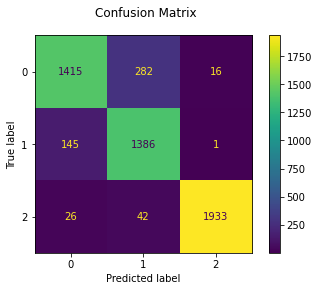

In [58]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()